In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [33]:
df=pd.read_csv("ecommerce2.csv")

In [34]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.isna().sum()

Email                     0
Address                   0
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     546
dtype: int64

In [36]:
df.shape

(1000, 8)

In [37]:
df=df.dropna()

In [38]:
df.shape

(454, 8)

In [39]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
5,Cobbborough,"DC 99414-7564""",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
7,Port Jason,"OH 22070-1220""",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
9,Port Jacobville,"PR 37242-1057""",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
991,Lake Jamiefurt,"UT 75292""",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
993,West Richard,"CA 19320""",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
995,South Chadburgh,"TN 56128""",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
997,Brendachester,"TX 05000-5873""",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [40]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [41]:
df=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [42]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,34.497268,12.655651,39.577668,4.082621,587.951054
3,31.926272,11.109461,37.268959,2.664034,392.204933
5,33.000915,11.330278,37.110597,4.104543,487.547505
7,34.305557,13.717514,36.721283,3.120179,581.852344
9,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
df.reset_index(drop=True,inplace=True)

In [44]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


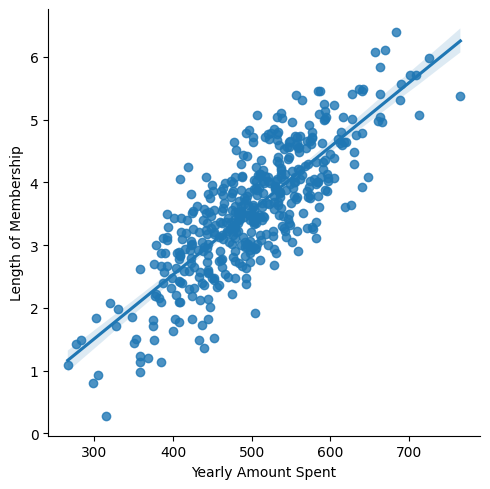

In [57]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

<Axes: xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

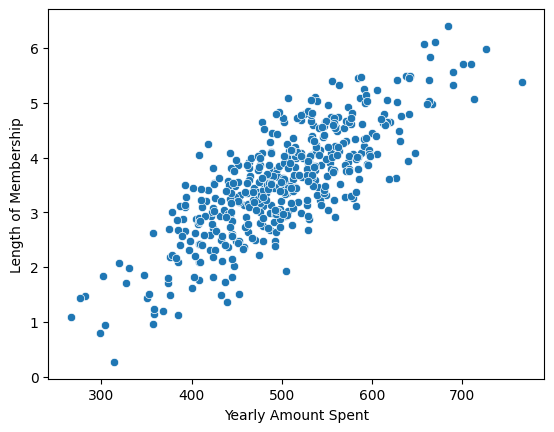

In [58]:
sns.scatterplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

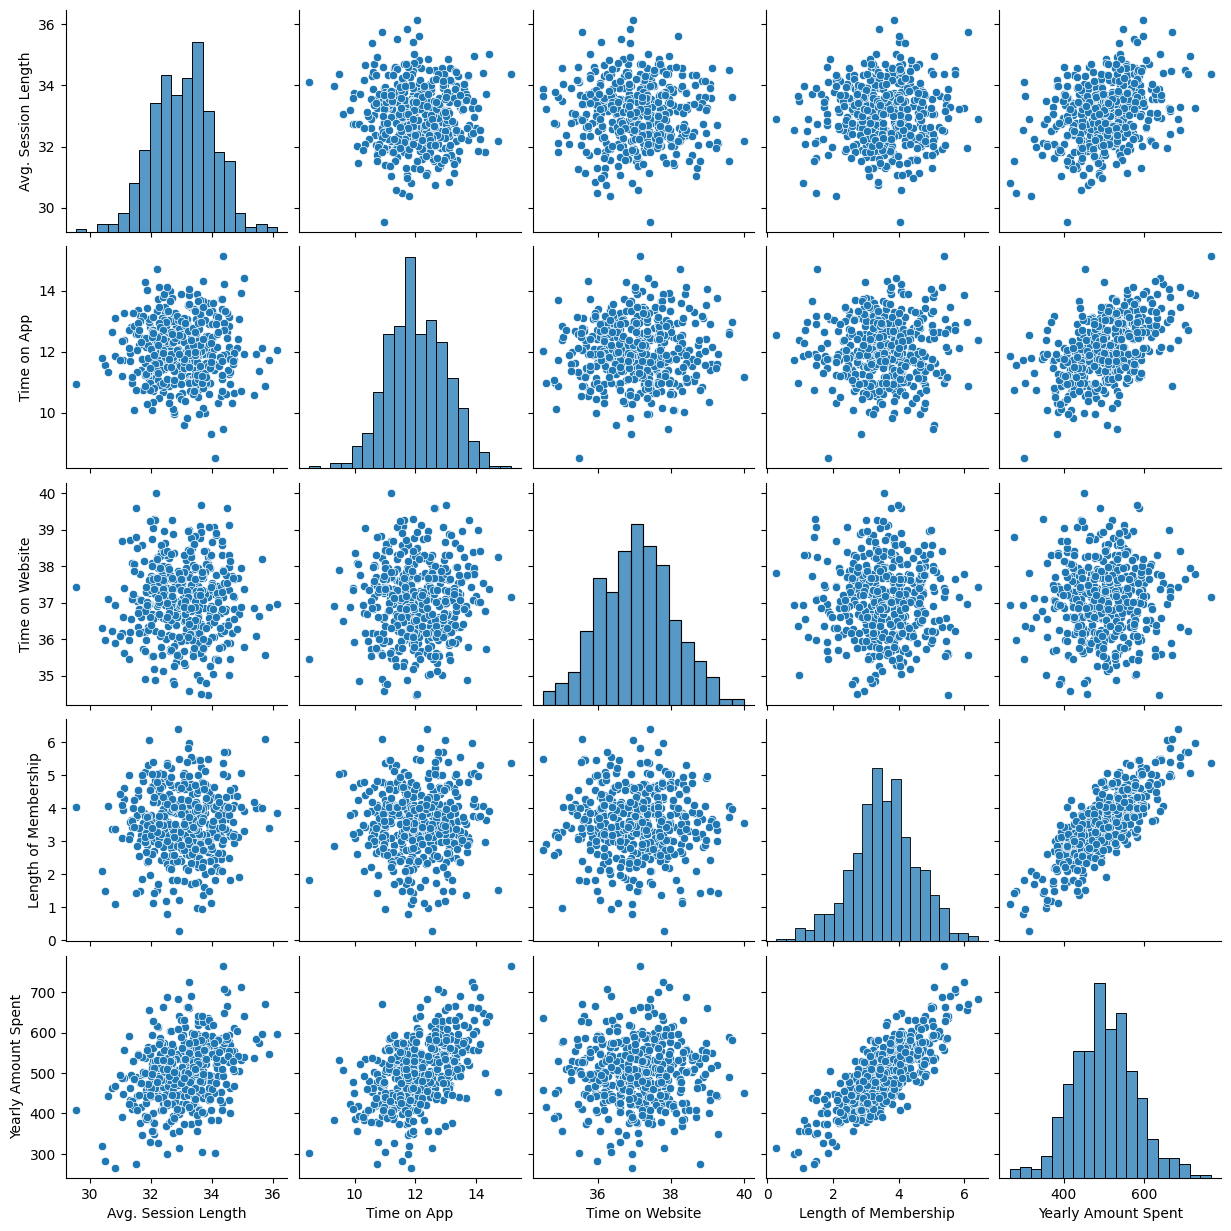

In [59]:
sns.pairplot(df)

In [48]:
X=df.drop("Yearly Amount Spent",axis=1)

In [49]:
y=df["Yearly Amount Spent"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [51]:
X_test2=X_test.iloc[0,:]

In [52]:
model=LinearRegression()

In [53]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred=model.predict(X_test)

In [55]:
coeffecients=pd.DataFrame(model.coef_,X.columns)
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.124898
Time on App,39.002112
Time on Website,0.815715
Length of Membership,61.506977


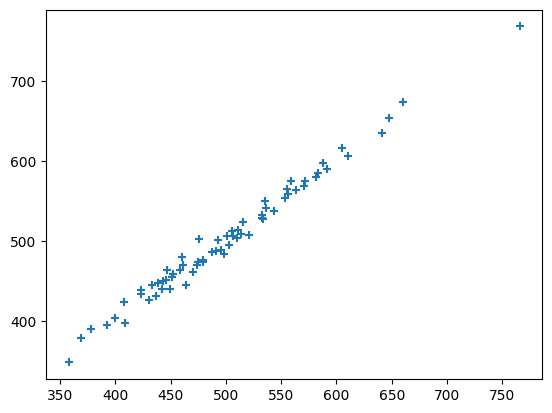

In [56]:
plt.scatter(y_test,y_pred,marker='+')

In [60]:
mse=mt.mean_squared_error(y_test,y_pred)
mae=mt.mean_absolute_error(y_test,y_pred)

In [61]:
print(f"MSE: {np.sqrt(mse)}")
print(f"MAE: {np.sqrt(mae)}")

MSE: 8.960341269505847
MAE: 2.6935078214809605


In [63]:
print(f"Max value for Yearly Amount Spent: {df["Yearly Amount Spent"].max().round(2)}")
print(f"Min value for Yearly Amount Spent: {df["Yearly Amount Spent"].min().round(2)}")

Max value for Yearly Amount Spent: 765.52
Min value for Yearly Amount Spent: 266.09


In [64]:
print(f"The min error in year spent predicted by the model: {((mse/df["Yearly Amount Spent"].max().round(2))*100).round(2)}")
print(f"The max error in year spent predicted by the model: {((mse/df["Yearly Amount Spent"].min().round(2))*100).round(2)}")

The min error in year spent predicted by the model: 10.49
The max error in year spent predicted by the model: 30.17


In [65]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')